In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import random
random.seed(0)

import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')


In [ ]:
import os
zip_file_path = '/content/drive/MyDrive/archive (2).zip'


In [ ]:
import zipfile

# Path to your ZIP file in Google Drive
extract_to = '/content/extracted_files/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Files extracted!")


Files extracted!


In [ ]:
print(os.listdir(extract_to))

['Skin Cancer Dataset']


In [ ]:
base_dir= '/content/extracted_files/Skin Cancer Dataset'

In [ ]:
import os


# Walk through all files and subdirectories within base_dir
non_image_files = []  # List to store non-image files

for root, dirs, files in os.walk(base_dir):
    for filename in files:
        if not (filename.lower().endswith('.jpeg') or filename.lower().endswith('.jpg')):
            non_image_files.append(os.path.join(root, filename))  # Add the non-image file path to the list

# Print non-image files (if any)
if non_image_files:
    print("Non-image files remaining:")
    for file in non_image_files:
        print(file)
else:
    print("No non-image files found.")


Non-image files remaining:
/content/extracted_files/Skin Cancer Dataset/Dermatofibroma/metadata.csv
/content/extracted_files/Skin Cancer Dataset/Vascular Lesion/metadata.csv


In [ ]:
import os

# Walk through all files and subdirectories within base_dir
non_image_files = []  # List to store non-image files

for root, dirs, files in os.walk(base_dir):
    for filename in files:
        if not (filename.lower().endswith('.jpeg') or filename.lower().endswith('.jpg')):
            non_image_file_path = os.path.join(root, filename)
            non_image_files.append(non_image_file_path)  # Add the non-image file path to the list

# Delete non-image files
if non_image_files:
    print("Deleting non-image files:")
    for file in non_image_files:
        try:
            os.remove(file)
            print(f"Deleted: {file}")
        except Exception as e:
            print(f"Failed to delete {file}: {e}")
else:
    print("No non-image files found.")

Deleting non-image files:
Deleted: /content/extracted_files/Skin Cancer Dataset/Dermatofibroma/metadata.csv
Deleted: /content/extracted_files/Skin Cancer Dataset/Vascular Lesion/metadata.csv


In [ ]:
import os


# Walk through all files and subdirectories within base_dir
non_image_files = []  # List to store non-image files

for root, dirs, files in os.walk(base_dir):
    for filename in files:
        if not (filename.lower().endswith('.jpeg') or filename.lower().endswith('.jpg')):
            non_image_files.append(os.path.join(root, filename))  # Add the non-image file path to the list

# Print non-image files (if any)
if non_image_files:
    print("Non-image files remaining:")
    for file in non_image_files:
        print(file)
else:
    print("No non-image files found.")


No non-image files found.


In [ ]:
import os
import hashlib


# Function to calculate hash of an image file
def get_image_hash(image_path):
    hash_md5 = hashlib.md5()  # You can use SHA256 instead of MD5 if preferred
    with open(image_path, 'rb') as f:
        # Read the image in chunks to handle large files
        for chunk in iter(lambda: f.read(4096), b""):
            hash_md5.update(chunk)
    return hash_md5.hexdigest()

# Dictionary to store hashes and the paths of the images
hashes = {}
duplicates = []  # List to store duplicate image paths

# Walk through all files and subdirectories within base_dir
for root, dirs, files in os.walk(base_dir):
    for filename in files:
        if filename.lower().endswith(('.jpeg', '.jpg')):  # Only check image files
            file_path = os.path.join(root, filename)
            file_hash = get_image_hash(file_path)

            # Check if the hash already exists in the dictionary
            if file_hash in hashes:
                duplicates.append(file_path)  # This is a duplicate image
                print(f"Duplicate found: {file_path}")
            else:
                hashes[file_hash] = file_path  # Store the hash and file path

# Delete duplicate images
if duplicates:
    print("Deleting duplicate images:")
    for file in duplicates:
        try:
            os.remove(file)
            print(f"Deleted: {file}")
        except Exception as e:
            print(f"Failed to delete {file}: {e}")
else:
    print("No duplicate images found.")

Duplicate found: /content/extracted_files/Skin Cancer Dataset/Acitinic Keratosis/ISIC_0068354.jpg
Duplicate found: /content/extracted_files/Skin Cancer Dataset/Acitinic Keratosis/ISIC_0062609.jpg
Duplicate found: /content/extracted_files/Skin Cancer Dataset/Acitinic Keratosis/ISIC_0066220.jpg
Duplicate found: /content/extracted_files/Skin Cancer Dataset/Acitinic Keratosis/ISIC_0054118.jpg
Duplicate found: /content/extracted_files/Skin Cancer Dataset/Acitinic Keratosis/ISIC_0057477.jpg
Duplicate found: /content/extracted_files/Skin Cancer Dataset/Acitinic Keratosis/ISIC_0070713.jpg
Duplicate found: /content/extracted_files/Skin Cancer Dataset/Dermatofibroma/ISIC_0014235.jpg
Duplicate found: /content/extracted_files/Skin Cancer Dataset/Pigmented Benign Keratosis/ISIC_0035996.jpg
Duplicate found: /content/extracted_files/Skin Cancer Dataset/Pigmented Benign Keratosis/ISIC_0035959.jpg
Duplicate found: /content/extracted_files/Skin Cancer Dataset/Pigmented Benign Keratosis/ISIC_0036019.jpg


In [ ]:
import os


# Count the number of image files
image_count = 0

# Walk through all files and subdirectories within base_dir
for root, dirs, files in os.walk(base_dir):
    for filename in files:
        if filename.lower().endswith(('.jpeg', '.jpg')):  # Check for image file extensions
            image_count += 1

# Print the total number of image files
print(f"Total number of images in the dataset: {image_count}")


Total number of images in the dataset: 4085


In [ ]:
#pip install tensorflow opencv-python


In [ ]:
  # Change to your dataset directory
melanoma_dir = os.path.join(base_dir, 'Melanoma')
#other_class_dir = os.path.join(base_dir, 'other_class')  # Replace with actual class names

# List all the files in the melanoma class directory
melanoma_images = [os.path.join(melanoma_dir, fname) for fname in os.listdir(melanoma_dir)]

# Randomly select 9 images to remove from melanoma class
images_to_remove = random.sample(melanoma_images, 21)

# Remove these 9 images from the directory (you can move them to another location if desired)
for image in images_to_remove:
    os.remove(image)

In [ ]:

melanoma_dir = os.path.join(base_dir, 'Basal Cell Carcinoma')
#other_class_dir = os.path.join(base_dir, 'other_class')  # Replace with actual class names

# List all the files in the melanoma class directory
melanoma_images = [os.path.join(melanoma_dir, fname) for fname in os.listdir(melanoma_dir)]

# Randomly select 9 images to remove from melanoma class
images_to_remove = random.sample(melanoma_images, 6)

# Remove these 9 images from the directory (you can move them to another location if desired)
for image in images_to_remove:
    os.remove(image)


melanoma_dir = os.path.join(base_dir, 'Nevus')
#other_class_dir = os.path.join(base_dir, 'other_class')  # Replace with actual class names

# List all the files in the melanoma class directory
melanoma_images = [os.path.join(melanoma_dir, fname) for fname in os.listdir(melanoma_dir)]

# Randomly select 9 images to remove from melanoma class
images_to_remove = random.sample(melanoma_images, 16)

# Remove these 9 images from the directory (you can move them to another location if desired)
for image in images_to_remove:
    os.remove(image)

melanoma_dir = os.path.join(base_dir, 'Seborrheic Keratosis')
#other_class_dir = os.path.join(base_dir, 'other_class')  # Replace with actual class names

# List all the files in the melanoma class directory
melanoma_images = [os.path.join(melanoma_dir, fname) for fname in os.listdir(melanoma_dir)]

# Randomly select 9 images to remove from melanoma class
images_to_remove = random.sample(melanoma_images, 12)

# Remove these 9 images from the directory (you can move them to another location if desired)
for image in images_to_remove:
    os.remove(image)

In [ ]:
import os



# Get a list of all class directories in the dataset directory
class_dirs = os.listdir(base_dir)

# Loop through each class directory and count the number of images
for class_dir in class_dirs:
    class_path = os.path.join(base_dir, class_dir)

    # Check if the path is indeed a directory (i.e., a class folder)
    if os.path.isdir(class_path):
        # List all files in the class directory
        image_files = os.listdir(class_path)

        # Filter out non-image files (optional)
        image_files = [file for file in image_files if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Print the class name and number of images
        print(f'Class: {class_dir} - Number of images: {len(image_files)}')


Class: Melanoma - Number of images: 484
Class: Acitinic Keratosis - Number of images: 494
Class: Squamous Cell Carcinoma - Number of images: 414
Class: Dermatofibroma - Number of images: 398
Class: Pigmented Benign Keratosis - Number of images: 493
Class: Basal Cell Carcinoma - Number of images: 493
Class: Vascular Lesion - Number of images: 289
Class: Seborrheic Keratosis - Number of images: 482
Class: Nevus - Number of images: 483


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler


# Step 1: Load MobileNetV2 model with pre-trained weights
base_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 2: Freeze the base model layers
base_model.trainable = False

# Step 3: Build the custom model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Step 4: Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Data augmentation for better generalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Increased rotation range
    width_shift_range=0.2,  # Increased width shift range
    height_shift_range=0.2,  # Increased height shift range
    shear_range=0.2,  # Increased shear range
    zoom_range=0.2,  # Increased zoom range
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% for validation
)

# For the test set, we will only rescale the images (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images and labels using ImageDataGenerator.flow_from_directory
train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(base_dir),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    directory=os.path.join(base_dir),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

# Calculate class weights for handling class imbalance
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weight_dict = dict(zip(np.unique(train_generator.classes), class_weights))

# Step 6: Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Step 7: Learning rate scheduler for better optimization
lr_schedule = LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 3))

# Step 8: Train the model
history = model.fit(
    train_generator,
    epochs=3,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, lr_schedule],
    class_weight=class_weight_dict  # Applying class weights during training
)

# Step 9: Unfreeze some of the base model layers for fine-tuning
base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile the model after unfreezing layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Fine-tuning with lower learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 3230 images belonging to 9 classes.
Found 800 images belonging to 9 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 493s 5s/step - accuracy: 0.1077 - loss: 2.2369 - val_accuracy: 0.0988 - val_loss: 2.2000 - learning_rate: 1.0000e-04
Epoch 2/3
  1/100 ━━━━━━━━━━━━━━━━━━━━ 3:38 2s/step - accuracy: 0.0938 - loss: 2.2448

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.0938 - loss: 2.2448 - val_accuracy: 0.0988 - val_loss: 2.2011 - learning_rate: 2.1544e-04
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 504s 4s/step - accuracy: 0.0989 - loss: 2.2614 - val_accuracy: 0.1025 - val_loss: 2.2344 - learning_rate: 4.6416e-04


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler


# Step 1: Load MobileNetV2 model with pre-trained weights
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 2: Freeze the base model layers
base_model.trainable = False

# Step 3: Build the custom model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Step 4: Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Data augmentation for better generalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Increased rotation range
    width_shift_range=0.2,  # Increased width shift range
    height_shift_range=0.2,  # Increased height shift range
    shear_range=0.2,  # Increased shear range
    zoom_range=0.2,  # Increased zoom range
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% for validation
)

# For the test set, we will only rescale the images (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images and labels using ImageDataGenerator.flow_from_directory
train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(base_dir),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    directory=os.path.join(base_dir),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

# Calculate class weights for handling class imbalance
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weight_dict = dict(zip(np.unique(train_generator.classes), class_weights))

# Step 6: Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Step 7: Learning rate scheduler for better optimization
lr_schedule = LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 3))

# Step 8: Train the model
history = model.fit(
    train_generator,
    epochs=3,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, lr_schedule],
    class_weight=class_weight_dict  # Applying class weights during training
)

# Step 9: Unfreeze some of the base model layers for fine-tuning
base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile the model after unfreezing layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Fine-tuning with lower learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 3230 images belonging to 9 classes.
Found 800 images belonging to 9 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 907s 9s/step - accuracy: 0.1032 - loss: 2.3900 - val_accuracy: 0.1025 - val_loss: 2.2114 - learning_rate: 1.0000e-04
Epoch 2/3
  1/100 ━━━━━━━━━━━━━━━━━━━━ 8:36 5s/step - accuracy: 0.0938 - loss: 2.3211

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.0938 - loss: 2.3211 - val_accuracy: 0.1025 - val_loss: 2.2075 - learning_rate: 2.1544e-04
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 892s 9s/step - accuracy: 0.0968 - loss: 2.3125 - val_accuracy: 0.1050 - val_loss: 2.2268 - learning_rate: 4.6416e-04


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler


# Step 1: Load MobileNetV2 model with pre-trained weights
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 2: Freeze the base model layers
base_model.trainable = False

# Step 3: Build the custom model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Step 4: Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Data augmentation for better generalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Increased rotation range
    width_shift_range=0.2,  # Increased width shift range
    height_shift_range=0.2,  # Increased height shift range
    shear_range=0.2,  # Increased shear range
    zoom_range=0.2,  # Increased zoom range
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% for validation
)

# For the test set, we will only rescale the images (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images and labels using ImageDataGenerator.flow_from_directory
train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(base_dir),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    directory=os.path.join(base_dir),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

# Calculate class weights for handling class imbalance
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weight_dict = dict(zip(np.unique(train_generator.classes), class_weights))

# Step 6: Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Step 7: Learning rate scheduler for better optimization
lr_schedule = LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 24))

# Step 8: Train the model
history = model.fit(
    train_generator,
    epochs=24,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, lr_schedule],
    class_weight=class_weight_dict  # Applying class weights during training
)

# Step 9: Unfreeze some of the base model layers for fine-tuning
base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile the model after unfreezing layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Fine-tuning with lower learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



Found 3230 images belonging to 9 classes.
Found 800 images belonging to 9 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/24
100/100 ━━━━━━━━━━━━━━━━━━━━ 304s 3s/step - accuracy: 0.2194 - loss: 2.1925 - val_accuracy: 0.3887 - val_loss: 1.6781 - learning_rate: 1.0000e-04
Epoch 2/24
  1/100 ━━━━━━━━━━━━━━━━━━━━ 2:12 1s/step - accuracy: 0.3125 - loss: 1.7655

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 60s 594ms/step - accuracy: 0.3125 - loss: 1.7655 - val_accuracy: 0.4025 - val_loss: 1.6957 - learning_rate: 1.1007e-04
Epoch 3/24
100/100 ━━━━━━━━━━━━━━━━━━━━ 311s 3s/step - accuracy: 0.4041 - loss: 1.6872 - val_accuracy: 0.4500 - val_loss: 1.5777 - learning_rate: 1.2115e-04
Epoch 4/24
100/100 ━━━━━━━━━━━━━━━━━━━━ 59s 579ms/step - accuracy: 0.5312 - loss: 1.4639 - val_accuracy: 0.4512 - val_loss: 1.5682 - learning_rate: 1.3335e-04
Epoch 5/24
100/100 ━━━━━━━━━━━━━━━━━━━━ 320s 3s/step - accuracy: 0.4682 - loss: 1.4936 - val_accuracy: 0.4288 - val_loss: 1.5748 - learning_rate: 1.4678e-04
Epoch 6/24
100/100 ━━━━━━━━━━━━━━━━━━━━ 84s 828ms/step - accuracy: 0.5000 - loss: 1.5236 - val_accuracy: 0.4437 - val_loss: 1.5453 - learning_rate: 1.6156e-04
Epoch 7/24
100/100 ━━━━━━━━━━━━━━━━━━━━ 328s 3s/step - accuracy: 0.4983 - loss: 1.4404 - val_accuracy: 0.4350 - val_loss: 1.5845 - learning_rate: 1.7783e-04
Epoch 8/24
100/100 ━━━━━━━━━━━━━━━━━━━━ 67s 661ms/step - accura

In [ ]:
# Save the model to a file
#model.save('/content/drive/MyDrive/models/skin_diseases_classifier.keras')  # This will save the model as an HDF5 file


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/models/skin_diseases_classifier.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 118 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# Get the file paths of the images in the validation set (i.e., test data)
validation_generator = train_datagen.flow_from_directory(
    directory=os.path.join(base_dir),
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation',  # Use the validation subset for testing
    shuffle=False  # Don't shuffle so that the paths stay in the same order as the images
)

# Print the file paths of the validation images
image_paths = validation_generator.filepaths

# Output all the file paths
for path in image_paths:
    print(path)


Found 800 images belonging to 9 classes.
/content/extracted_files/Skin Cancer Dataset/Acitinic Keratosis/ISIC_0053515.jpg
/content/extracted_files/Skin Cancer Dataset/Acitinic Keratosis/ISIC_0053563.jpg
/content/extracted_files/Skin Cancer Dataset/Acitinic Keratosis/ISIC_0053595.jpg
/content/extracted_files/Skin Cancer Dataset/Acitinic Keratosis/ISIC_0053597.jpg
/content/extracted_files/Skin Cancer Dataset/Acitinic Keratosis/ISIC_0053657.jpg
/content/extracted_files/Skin Cancer Dataset/Acitinic Keratosis/ISIC_0053664.jpg
/content/extracted_files/Skin Cancer Dataset/Acitinic Keratosis/ISIC_0053679.jpg
/content/extracted_files/Skin Cancer Dataset/Acitinic Keratosis/ISIC_0053688.jpg
/content/extracted_files/Skin Cancer Dataset/Acitinic Keratosis/ISIC_0053708.jpg
/content/extracted_files/Skin Cancer Dataset/Acitinic Keratosis/ISIC_0053736.jpg
/content/extracted_files/Skin Cancer Dataset/Acitinic Keratosis/ISIC_0053738.jpg
/content/extracted_files/Skin Cancer Dataset/Acitinic Keratosis/ISIC

25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step
Accuracy: 0.4562
Confusion Matrix:
[[58  1  2  1  0  2  8 23  3]
 [27 12  7  3  0  3 16 24  6]
 [ 2  3 15  3  3  6 33  9  5]
 [ 4  0  6 54  0  6 14  7  5]
 [ 0  2  5  5 65  7 10  2  0]
 [ 5  1  8 11  5 54  9  4  1]
 [20  1  0 10  1 11 35 12  6]
 [ 0  1  0  2  0  6 39 31  3]
 [ 0  1  6  1  0  4  2  2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.59      0.54        98
           1       0.55      0.12      0.20        98
           2       0.31      0.19      0.23        79
           3       0.60      0.56      0.58        96
           4       0.88      0.68      0.76        96
           5       0.55      0.55      0.55        98
           6       0.21      0.36      0.27        96
           7       0.27      0.38      0.32        82
           8       0.59      0.72      0.65        57

    accuracy                           0.46       800
   macro avg       0.49      0.46   

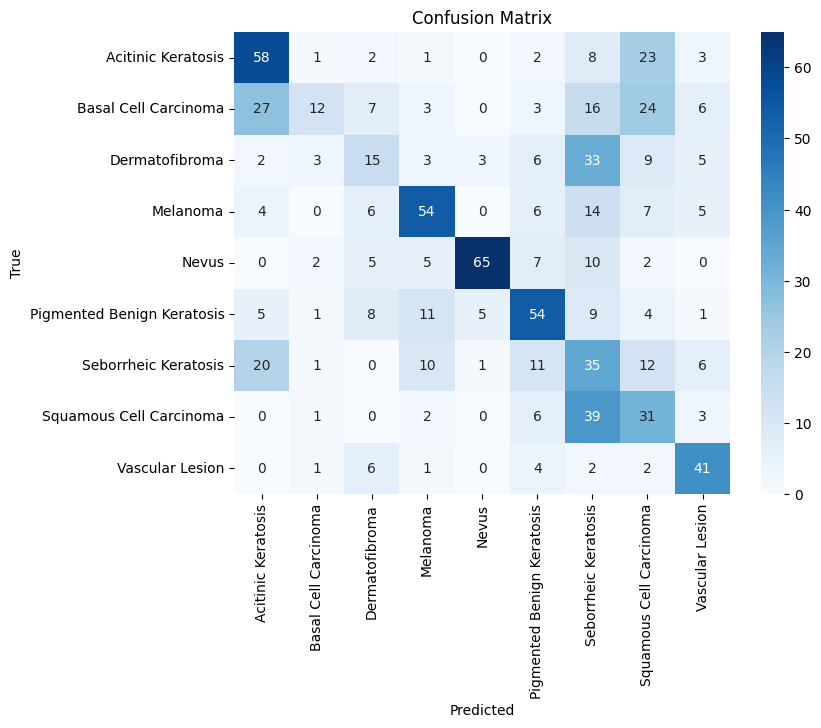

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Step 1: Make predictions on the validation/test set
# You can use the validation_generator or a separate test set for predictions
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=-1)

# Step 2: Get the true labels
true_labels = validation_generator.classes  # This will give you the true labels from the validation data

# Step 3: Compute the accuracy
accuracy = accuracy_score(true_labels, predicted_classes)
print(f'Accuracy: {accuracy:.4f}')

# Step 4: Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)
print('Confusion Matrix:')
print(conf_matrix)

# Step 5: Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(true_labels, predicted_classes)
print('Classification Report:')
print(class_report)

# Optional: To visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


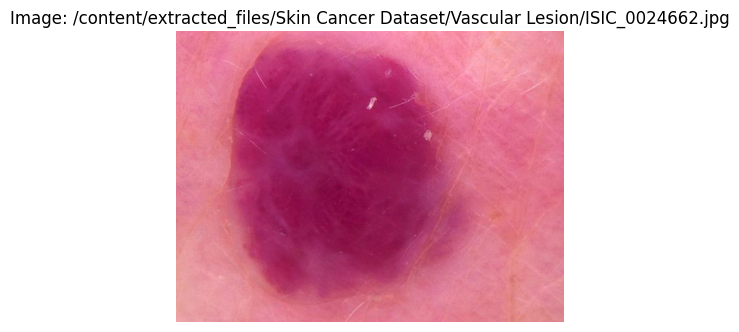

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Specify the path to the image you want to display
image_path = '/content/extracted_files/Skin Cancer Dataset/Vascular Lesion/ISIC_0024662.jpg'  # Change this to your image path

# Open the image using PIL
img = Image.open(image_path)

# Display the image using Matplotlib
plt.figure(figsize=(5, 5))  # Optional: Set the size of the display
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.title(f'Image: {image_path}')  # Optional: Add title
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load your trained model (if it's saved)
# model = tf.keras.models.load_model('path_to_your_model.h5')

# Class labels corresponding to your model's output
class_labels = ['Acitinic Keratosis', 'Basal Cell Carcinoma', 'Dermatofibroma',
                'Melanoma', 'Nevus', 'Pigmented Benign Keratosis',
                'Seborrheic Keratosis', 'Squamous Cell Carcinoma', 'Vascular Lesion']

def predict_disease(image_path):
    # Load the image without any preprocessing (assuming image is preprocessed correctly)
    img = image.load_img(image_path, target_size=(224, 224))  # Resize image to match model input size
    img_array = image.img_to_array(img) / 255.0  # Normalize if the image is not preprocessed

    # Add batch dimension (since model expects a batch of images)
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class of the image
    predictions = model.predict(img_array)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions, axis=-1)[0]

    # Map the index to the corresponding class label
    predicted_disease = class_labels[predicted_class_index]

    return predicted_disease

# Example usage: Predict the disease for a given test image
image_path = '/content/extracted_files/Skin Cancer Dataset/Vascular Lesion/ISIC_0024662.jpg'  # Replace with the path to your image
predicted_disease = predict_disease(image_path)
print(f'The predicted disease for the image is: {predicted_disease}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The predicted disease for the image is: Vascular Lesion


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load your trained model (if it's saved)
# model = tf.keras.models.load_model('path_to_your_model.h5')

# Class labels corresponding to your model's output
class_labels = ['Acitinic Keratosis', 'Basal Cell Carcinoma', 'Dermatofibroma',
                'Melanoma', 'Nevus', 'Pigmented Benign Keratosis',
                'Seborrheic Keratosis', 'Squamous Cell Carcinoma', 'Vascular Lesion']

def predict_disease(image_path):
    # Load the image without any preprocessing (assuming image is preprocessed correctly)
    img = image.load_img(image_path, target_size=(224, 224))  # Resize image to match model input size
    img_array = image.img_to_array(img) / 255.0  # Normalize if the image is not preprocessed

    # Add batch dimension (since model expects a batch of images)
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class of the image
    predictions = model.predict(img_array)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions, axis=-1)[0]

    # Map the index to the corresponding class label
    predicted_disease = class_labels[predicted_class_index]

    return predicted_disease

# Example usage: Predict the disease for a given test image
image_path = '/content/extracted_files/Skin Cancer Dataset/Dermatofibroma/ISIC_0011410.jpg'  # Replace with the path to your image
predicted_disease = predict_disease(image_path)
print(f'The predicted disease for the image is: {predicted_disease}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
The predicted disease for the image is: Pigmented Benign Keratosis


In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load your trained model (if it's saved)
# model = tf.keras.models.load_model('path_to_your_model.h5')

# Class labels corresponding to your model's output
class_labels = ['Acitinic Keratosis', 'Basal Cell Carcinoma', 'Dermatofibroma',
                'Melanoma', 'Nevus', 'Pigmented Benign Keratosis',
                'Seborrheic Keratosis', 'Squamous Cell Carcinoma', 'Vascular Lesion']

def predict_disease(image_path):
    # Load the image without any preprocessing (assuming image is preprocessed correctly)
    img = image.load_img(image_path, target_size=(224, 224))  # Resize image to match model input size
    img_array = image.img_to_array(img) / 255.0  # Normalize if the image is not preprocessed

    # Add batch dimension (since model expects a batch of images)
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class of the image
    predictions = model.predict(img_array)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions, axis=-1)[0]

    # Map the index to the corresponding class label
    predicted_disease = class_labels[predicted_class_index]

    return predicted_disease

# Example usage: Predict the disease for a given test image
image_path = '/content/ISIC_0001114.jpg'  # Replace with the path to your image
predicted_disease = predict_disease(image_path)
print(f'The predicted disease for the image is: {predicted_disease}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
The predicted disease for the image is: Dermatofibroma


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load your trained model (if it's saved)
# model = tf.keras.models.load_model('path_to_your_model.h5')

# Class labels corresponding to your model's output
class_labels = ['Acitinic Keratosis', 'Basal Cell Carcinoma', 'Dermatofibroma',
                'Melanoma', 'Nevus', 'Pigmented Benign Keratosis',
                'Seborrheic Keratosis', 'Squamous Cell Carcinoma', 'Vascular Lesion']

def predict_disease(image_path):
    # Load the image without any preprocessing (assuming image is preprocessed correctly)
    img = image.load_img(image_path, target_size=(224, 224))  # Resize image to match model input size
    img_array = image.img_to_array(img) / 255.0  # Normalize if the image is not preprocessed

    # Add batch dimension (since model expects a batch of images)
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class of the image
    predictions = model.predict(img_array)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions, axis=-1)[0]

    # Map the index to the corresponding class label
    predicted_disease = class_labels[predicted_class_index]

    return predicted_disease

# Example usage: Predict the disease for a given test image
image_path = '/content/extracted_files/Skin Cancer Dataset/Seborrheic Keratosis/ISIC_0061423.jpg'  # Replace with the path to your image
predicted_disease = predict_disease(image_path)
print(f'The predicted disease for the image is: {predicted_disease}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
The predicted disease for the image is: Seborrheic Keratosis
